<a href="https://colab.research.google.com/github/Mahfooz167/Mahfooz_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING/blob/main/Mahfooz_Netflix__Movies_and_TV_Shows_Clustering_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Netflix Movies and TV Shows Clustering**  


 **Project Type** - Unsupervised  

**Contribution**  - Individual  

**Team Member 1 - Md Mahfooz Alam Ansari**





# **Project Summary**

**Problem Statement**: In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.
The main objective is to exploring all other insights from netflix datset and clustering similar content by matching text based feature.

Methodology & Insights:

**Methodology & Insights:**  

Let's take a short recap on what we have done. In exploratory analysis we first find the duplicate we found no duplicates but we have 2389 null values in director, 718 in cast, 507 in country, 10 in date_added, 7 in rating column.Then we found the percentage of content type of netflix in a pie plot. We found the movie counts more than tv shows. Also we found 'Love','Man','World','Story','Life','christmas' are the most frequently used words in title.we got Raul Campos, jan suter combinely best director. Anupam Kher is the most popular actor in netflix followed by sharukhkhan. we can find that The United States stands out on top since Netflix is an American company. India comes in second followed by the UK and Canada.we found 2018 has the highest movie count in netflix and the report in 2010 where it said tv shows are triple in 2018 that becomes true completely. Most of the programme in netflix are TV-MA(36.8%) and TV-14(24.8%) rated and Most movies in netflix have 70-120 min duration we found.After creating genres we can see International movies,tv shows are most popular allmost in all over the world.we can also see december month relesed most content in netflix.

In text analysis (NLP) and data pre-processing I removed punctuations,stop words as they are unhelpful part then we count vocabulary items using countvectorizer() which create dictionary of most frequent important words.Then we use stemming for text normalization process then to transform text into a meaningful representation of numbers which is used to fit a machine learning algorithm for prediction here we use Tf-IDF vectorization.from this we got seref,orai,lukasz these words are top in vocab present in description and top vocabulary present in listed_in are tv,thriller,teen,talk etc.Applied different clustering models like Kmeans, hierarchical, Agglomerative clustering,DBSCAN on data we got the best cluster arrangements.we get the optimal number of cluster is equal to 3.Then after creating recommendation system based on description and genre we got best movies according to our recent interest.

#**Github Link**

#**Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

![Alt text](https://img.etimg.com/thumb/width-640,height-480,imgsize-122460,resizemode-75,msid-104897772/news/international/us/netflix-movies-dc-extended-universe-films-to-be-released-on-streaming-giant-check-date.jpg)




#**In this project we are doing**


* Understand the dataset and problem statement  

* Exploratory Data Analysis  

* Dealing with missing values and outliers  

* Data Cleaning  

* Exploring Exceptional Cases  

* Pre-processing-TFIDF  

* Selecting the approach and alogorithm to be used  

* Brief strategy for cluster formed
Conclusion

#**Attribute Information**


1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

#**Let's Understand our Data First**

#**Import Libraries**


In [ ]:

#necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.cm as cm

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch


import warnings
warnings.filterwarnings('ignore')

#**Dataset Loading**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#read the data
df=pd.read_csv("/content/drive/MyDrive/Almabetter /NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

#**Dataset first look**

In [ ]:
#dataset first look, see in transpose
df.head().T


,0,1,2,3,4
show_id,s1,s2,s3,s4,s5
type,TV Show,Movie,Movie,Movie,Movie
title,3%,7:19,23:59,9,21
director,NaN,Jorge Michel Grau,Gilbert Chan,Shane Acker,Robert Luketic
cast,"João Miguel, Bianca Comparato, Michel Gomes, R...","Demián Bichir, Héctor Bonilla, Oscar Serrano, ...","Tedd Chan, Stella Chung, Henley Hii, Lawrence ...","Elijah Wood, John C. Reilly, Jennifer Connelly...","Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar..."
country,Brazil,Mexico,Singapore,United States,United States
date_added,"August 14, 2020","December 23, 2016","December 20, 2018","November 16, 2017","January 1, 2020"
release_year,2020,2016,2011,2009,2008
rating,TV-MA,TV-MA,R,PG-13,PG-13
duration,4 Seasons,93 min,78 min,80 min,123 min


#**Dataset Rows and Columns Count**


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
df.describe()


,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


#**Duplicated Values**


In [ ]:
#check duplicated values
df.duplicated().sum()

0

 * **So, There are no duplicated values in dataset**


#**Misssing Values/ Null Values**


In [ ]:
# checking null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

 * **We have 2389 null values in director, 718 in cast, 507 in country, 10 in date_added, 7 in rating column**


<Axes: >

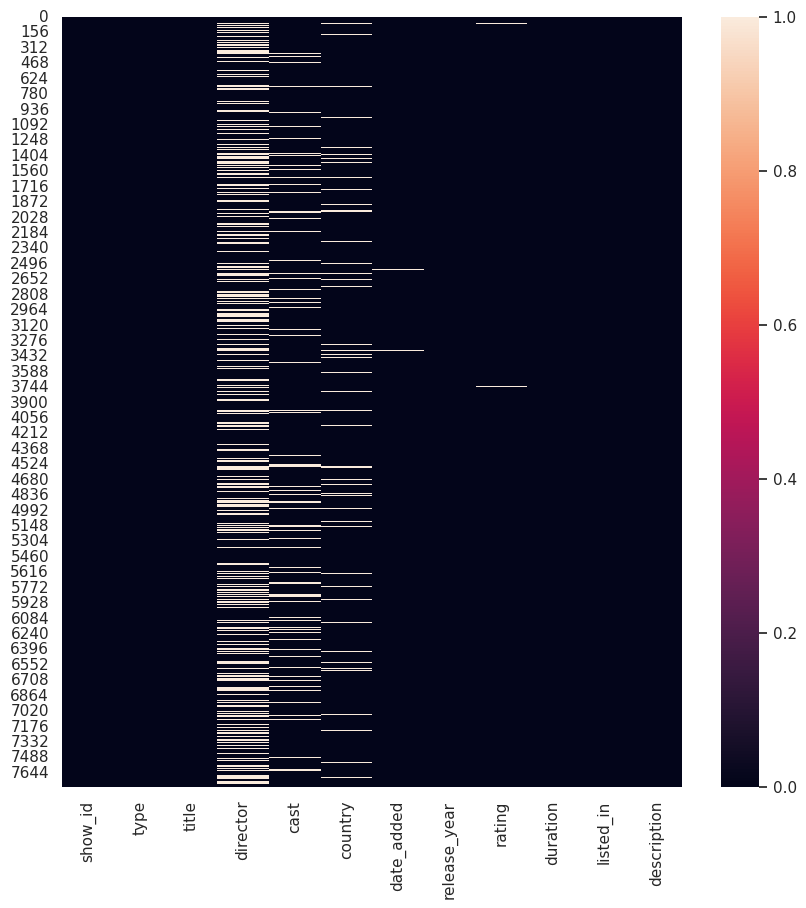

In [ ]:
#Visualizing the missing values
sns.heatmap(df.isnull())

<Axes: >

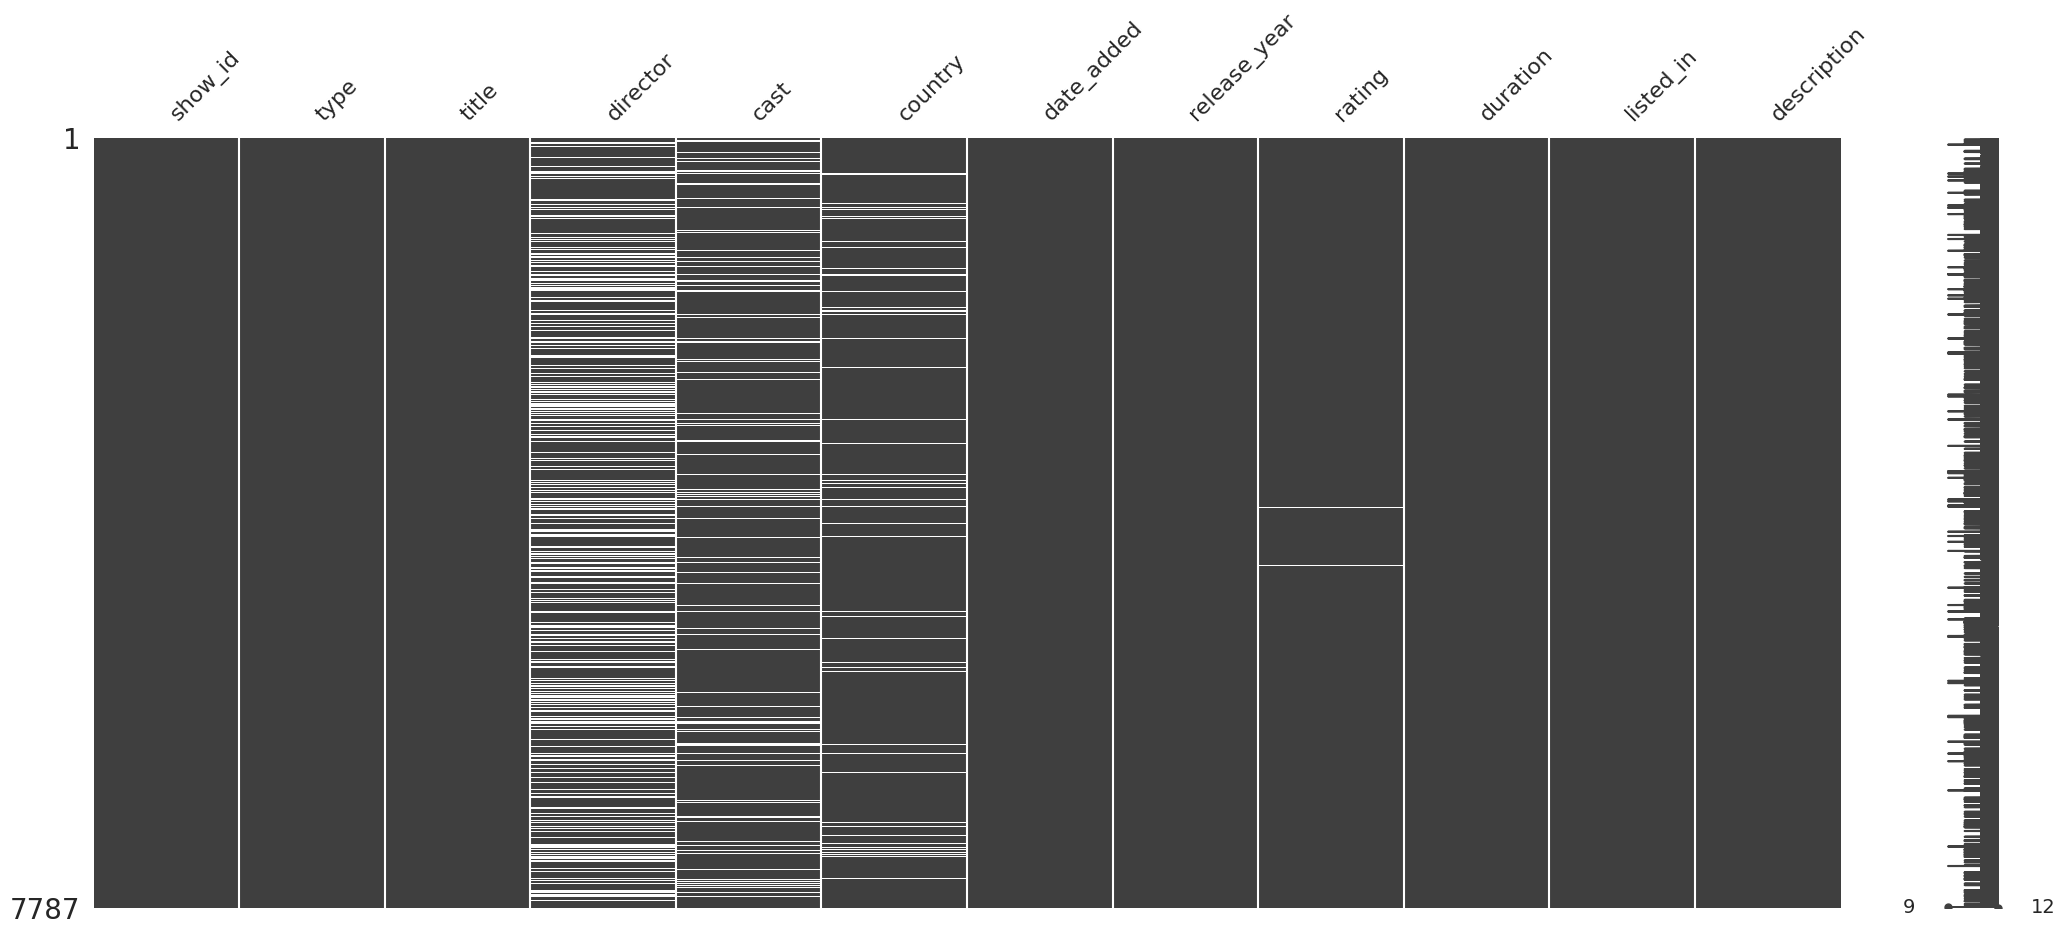

In [ ]:
msno.matrix(df)

<Axes: >

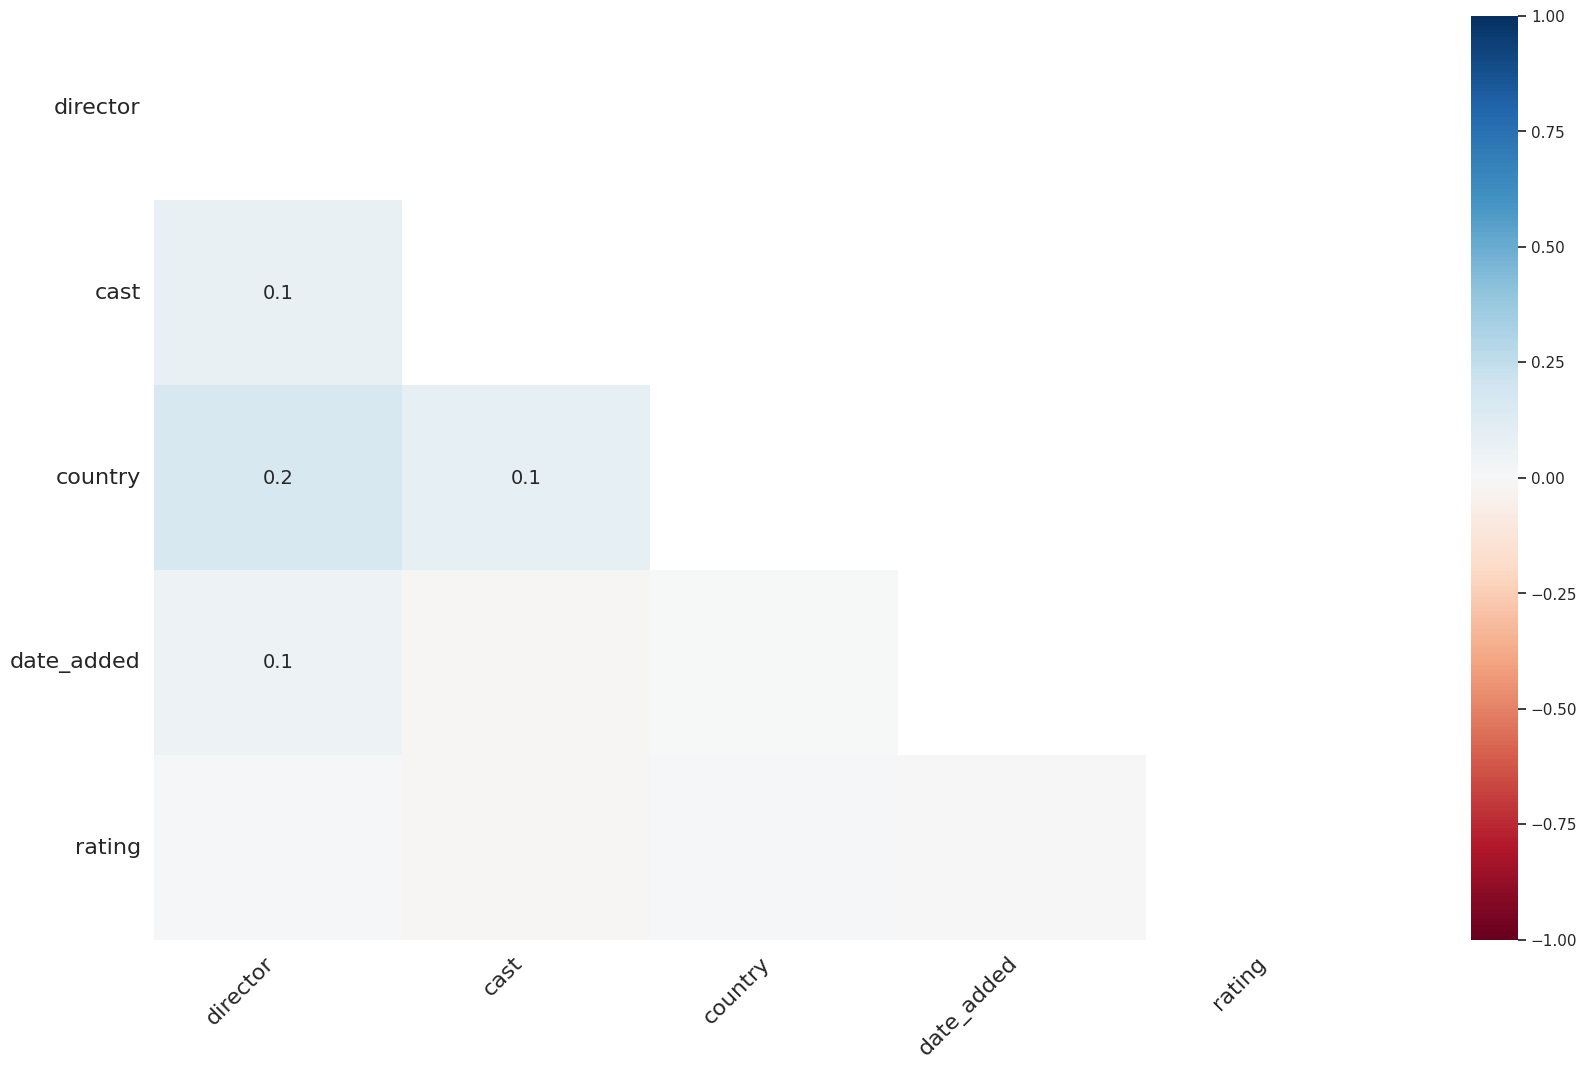

In [ ]:
msno.heatmap(df)

* here also we can visualize same thing  

diector,cast,country has many missing values, rating has small missing values

In [ ]:
#Looking for unique values
df.nunique()


show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

* We know from our dataset

* 7787 rows, 12 columns ( 1 int type, 11 object type)
* No duplicate rows
* We had 2389 null values in director, 718 in cast, 507 in country, 10 in * date_added, 7 in rating column.
* almost all columns in dataset have unique values

# **Understanding the variables**


In [ ]:
#dataset columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


#**Variables Description**

1.show_id : Unique ID for every Movie / Tv Show

2.type : Identifier - A Movie or TV Show

3.title : Title of the Movie / Tv Show

4.director : Director of the Movie

5.cast : Actors involved in the movie / show

6.country : Country where the movie / show was produced

7.date_added : Date it was added on Netflix

8.release_year : Actual Releaseyear of the movie / show

9.rating : TV Rating of the movie / show

10.duration : Total Duration - in minutes or number of seasons

11.listed_in : Genere

12.description: The Summary description

#**Data Wrangling/EDA**


#**univariate analysis before clustering**


#**1.Type column**

In [ ]:
df.type.value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

<Axes: xlabel='type', ylabel='count'>

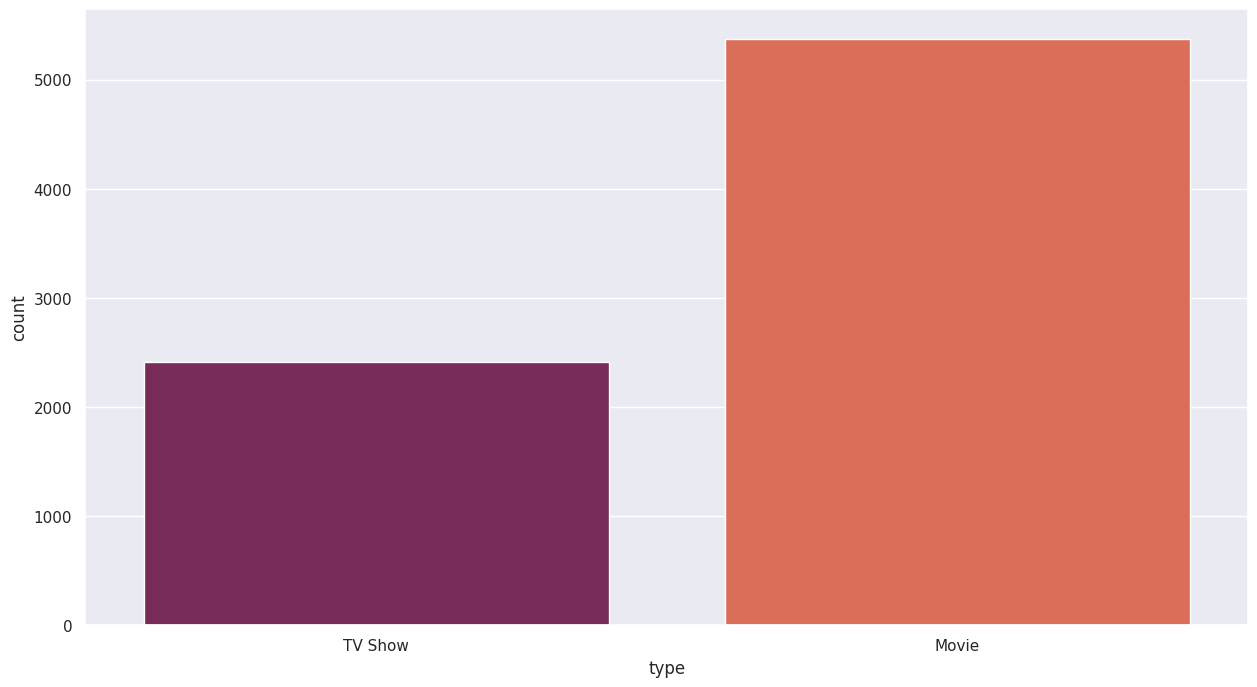

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x='type',data=df,color='b',palette='rocket')

* We can see netflix has more movies than tv shows.
*5372 movies and 2398 tv shows

Text(0.5, 1.0, 'Distribution of Type')

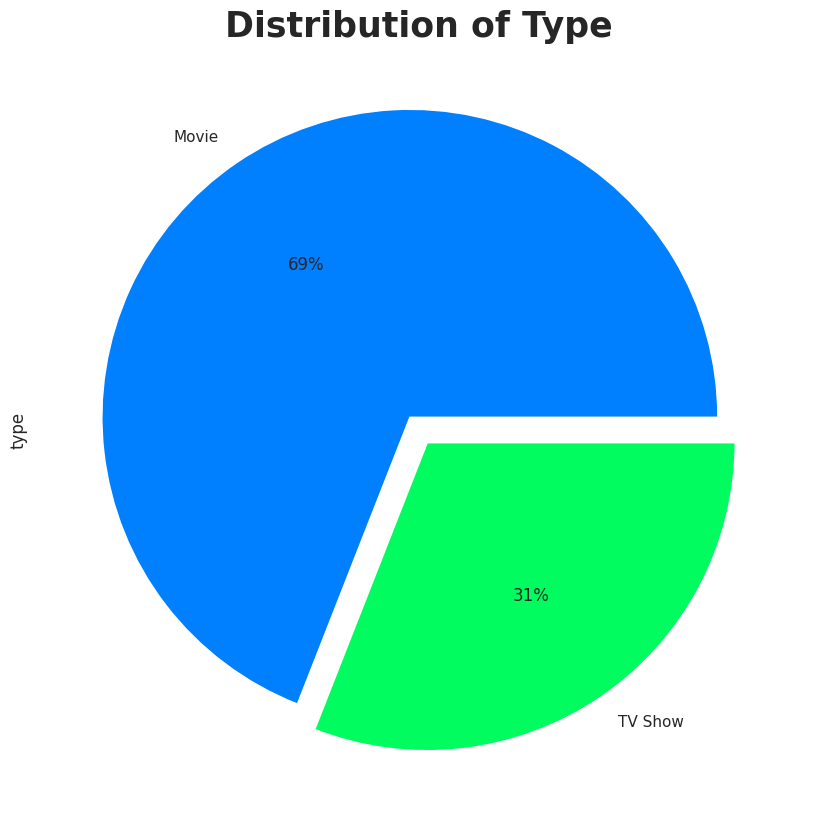

In [ ]:
#better visualization with pie chart
sns.set_palette('gist_ncar')
df.type.value_counts().plot(kind='pie',autopct='%1.0f%%',explode=(0.05, 0.05))
plt.title('Distribution of Type', fontsize=25,fontweight='bold')


**It seems like Netflix has more movies than TV shows in a percentage of 69% against 31% approximately.**


#**2.Title Column**

In [ ]:
#number unique points
df.title.nunique()

7787

In [ ]:
#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

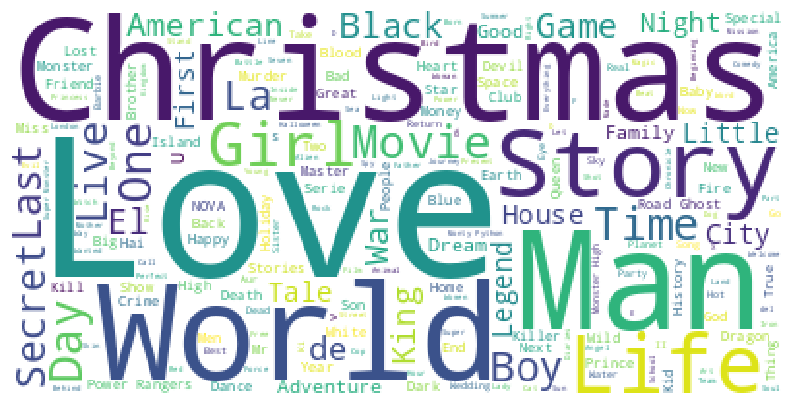

In [ ]:
#subsetting the dataframe
df_wc=df['title']
text=" ".join(i for i in df_wc)
#create stopword list
stopwords=set(STOPWORDS)
#generate a word cloud image
wordcloud=WordCloud(stopwords=stopwords, background_color='white').generate(text)
#Display the generated images
plt.imshow(wordcloud,interpolation='nearest')
plt.axis('off')
plt.show()

* Inference:
* 'Love','Man','World','Story','Life' seems very common in titles
*There are overwhelming number of content having 'Christmas'
* We are suspecting "Christmas" titles to be a very seasonal thing with most of the shows likely to be released during the month of December. However, we do not have the release month in this data to confirm our hypothesis.


In [ ]:
df.title

0                                            3%
1                                          7:19
2                                         23:59
3                                             9
4                                            21
                         ...                   
7782                                       Zozo
7783                                     Zubaan
7784                          Zulu Man in Japan
7785                      Zumbo's Just Desserts
7786    ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS
Name: title, Length: 7787, dtype: object

#**3.Director**


In [ ]:
#number of unique dir
df.director.nunique()

4049

In [ ]:
#looking at director
df.director

0                     NaN
1       Jorge Michel Grau
2            Gilbert Chan
3             Shane Acker
4          Robert Luketic
              ...        
7782          Josef Fares
7783          Mozez Singh
7784                  NaN
7785                  NaN
7786             Sam Dunn
Name: director, Length: 7787, dtype: object

<Axes: xlabel='count', ylabel='type'>

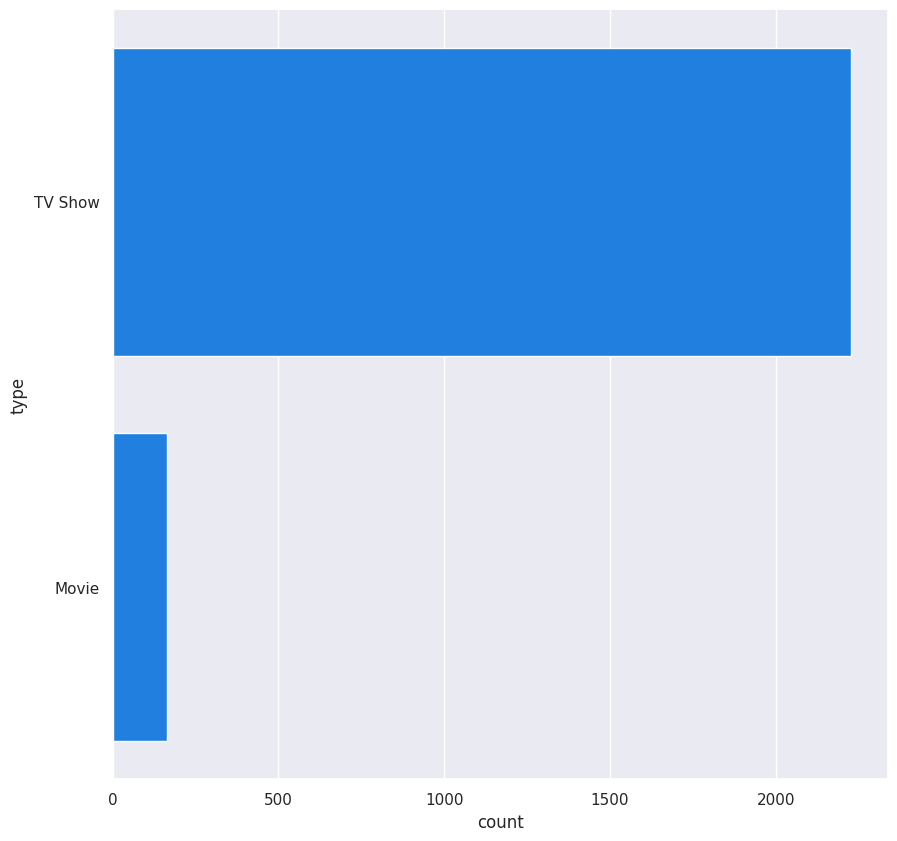

In [ ]:
#Looking for which category have maximum nulls in director column
missing_df=df[df['director'].isna()]
sns.countplot(missing_df['type'])

* **Inference**: Most of the missing columns of directors are for TV Shows

#**Top 10 Directors of Netflix**

Text(0.5, 1.0, 'Top 10 Directors of Netflix')

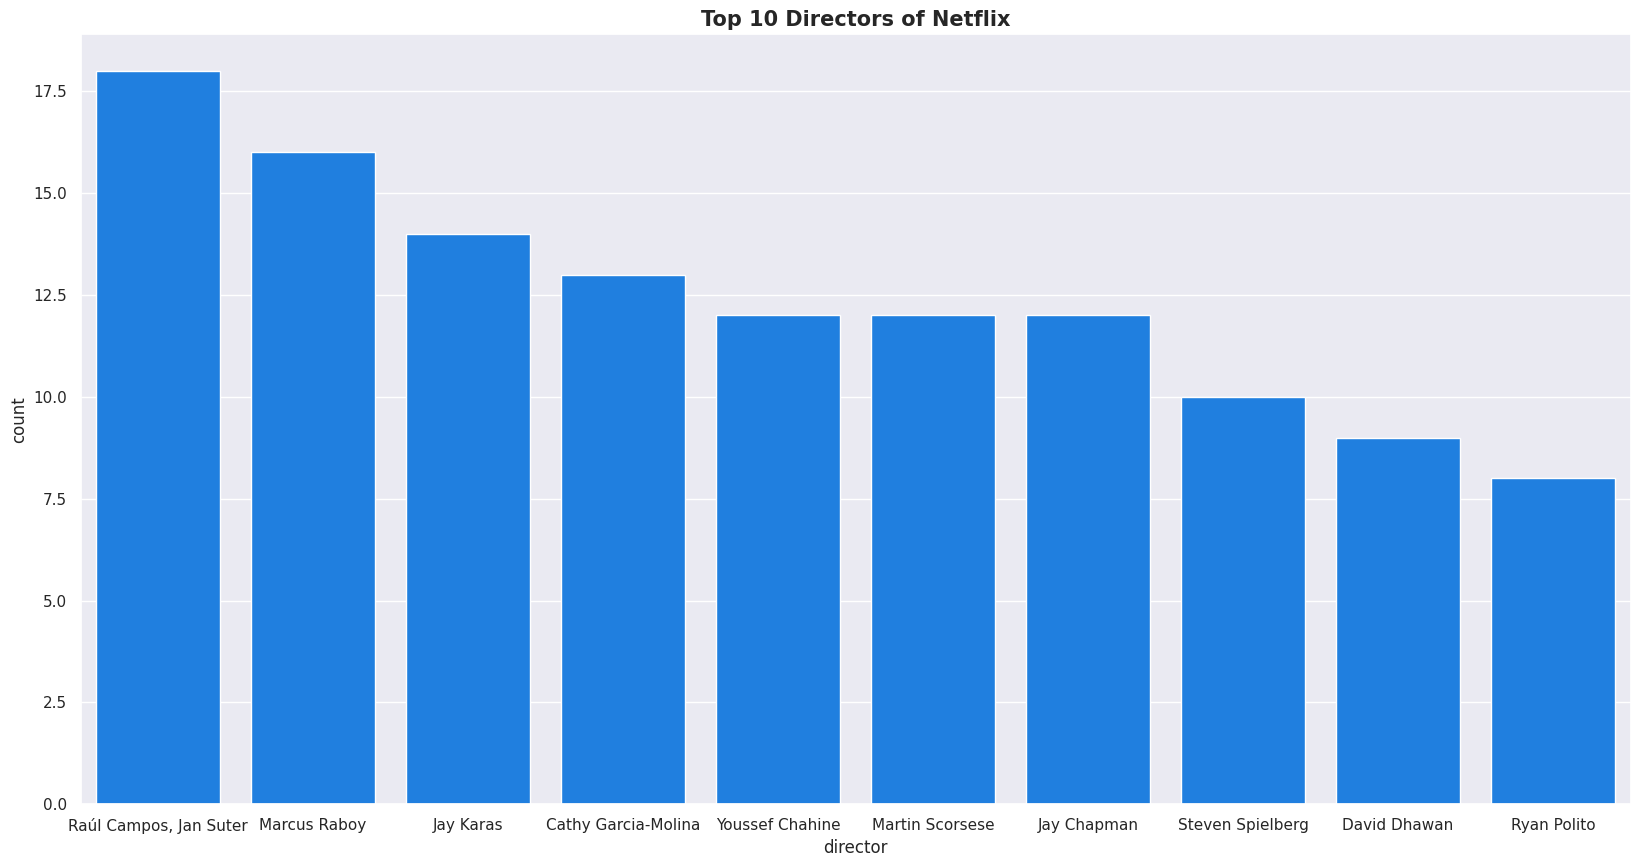

In [ ]:
#visualize top 10 directors
plt.figure(figsize=(20,10))
graph=sns.countplot(x='director',data=df,order=df.director.value_counts().head(10).index)
graph.set_title("Top 10 Directors of Netflix",fontsize=15,fontweight='bold')

* **Inference**:  

   * Raul Campos, jan suter combinely best director who directs most movies(18) in netflix followed by marcus roby(16), jay karas(14), catthy garcia-molina(13) etc.

In [ ]:
#filling null values of director column
df['director']=df['director'].fillna('',inplace=True)

#**4.Cast**

In [ ]:
#unique number of cast
df.cast.nunique()

6831

In [ ]:
#fill the missing values
df_actors=df['cast'].fillna('')

In [ ]:
df_actors

0       João Miguel, Bianca Comparato, Michel Gomes, R...
1       Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2       Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3       Elijah Wood, John C. Reilly, Jennifer Connelly...
4       Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
                              ...                        
7782    Imad Creidi, Antoinette Turk, Elias Gergi, Car...
7783    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
7784                                              Nasty C
7785                           Adriano Zumbo, Rachel Khoo
7786                                                     
Name: cast, Length: 7787, dtype: object

#**Top 10 actors on netflix**

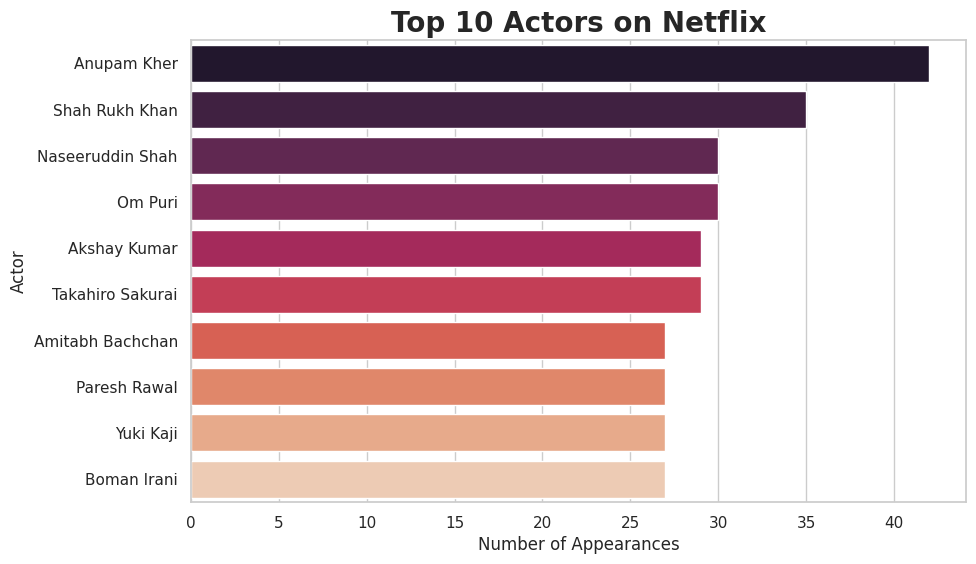

In [ ]:
# Graph for top 10 actors
actor = df[df.cast != ' '].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# Count the occurrences of each actor
actor_counts = actor.value_counts()

# Code for graph visualization
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Use barplot instead of countplot and provide the counts directly
sns.barplot(x=actor_counts.values[:10], y=actor_counts.index[:10], palette='rocket')
plt.title('Top 10 Actors on Netflix', fontsize=20, fontweight='bold')
plt.xlabel('Number of Appearances')
plt.ylabel('Actor')
plt.show()


* Inference:  

 * Anupam Kher is the most popular actor in netflix followed by sharukhkhan, nashiruddin shah,om puri,akshay kumar etc.  

  * Anupam kher's movie count is over 40 in netflix and for sharukhkhan it is 35. even no body is nearer to them in terms of movie count in netflix. It defines that netflix prefers both of them very much in their movies.

#**5.Country**

In [ ]:
#unique column in country
df.country.nunique()


681

#**Top 10 countries on netflix**

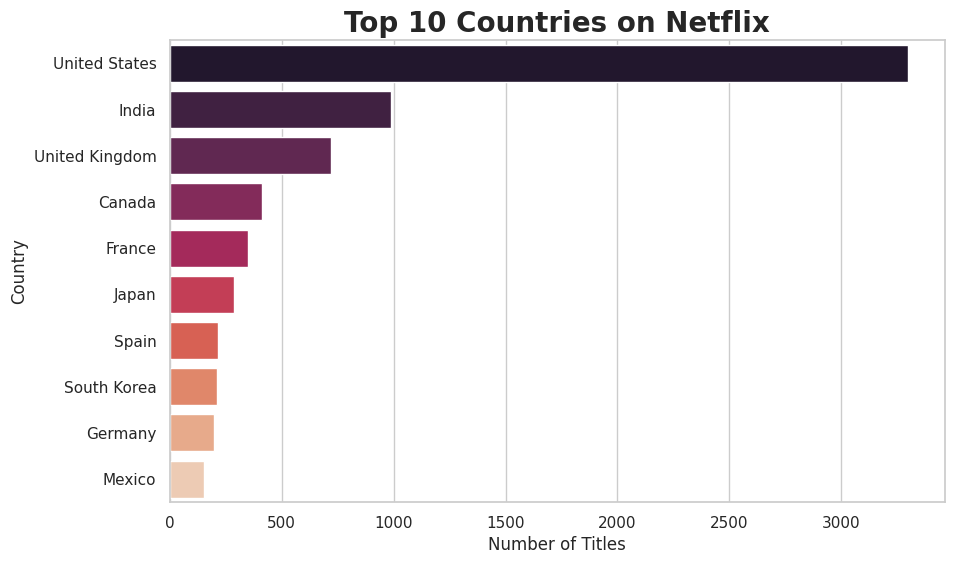

In [ ]:
# Graph for top 10 countries
country = df[df.country != ' '].set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# Count the occurrences of each country
country_counts = country.value_counts()

# Code for graph visualization
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Use barplot instead of countplot and provide the counts directly
sns.barplot(x=country_counts.values[:10], y=country_counts.index[:10], palette='rocket')
plt.title('Top 10 Countries on Netflix', fontsize=20, fontweight='bold')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


* **Inference**:  

So, As you can see that

* The United States stands out on top since Netflix is an American company.

* India comes in second followed by the UK and Canada.

#**6.Date Added**

In [ ]:
#changed date added to datetime object
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [ ]:
#year wise movie counts
df['year_added'].value_counts().reset_index().rename(columns={'index': 'year','year_added':'movie_count'})

,year,movie_count
0,2019.0,2153
1,2020.0,2009
2,2018.0,1685
3,2017.0,1225
4,2016.0,443
5,2021.0,117
6,2015.0,88
7,2014.0,25
8,2011.0,13
9,2013.0,11


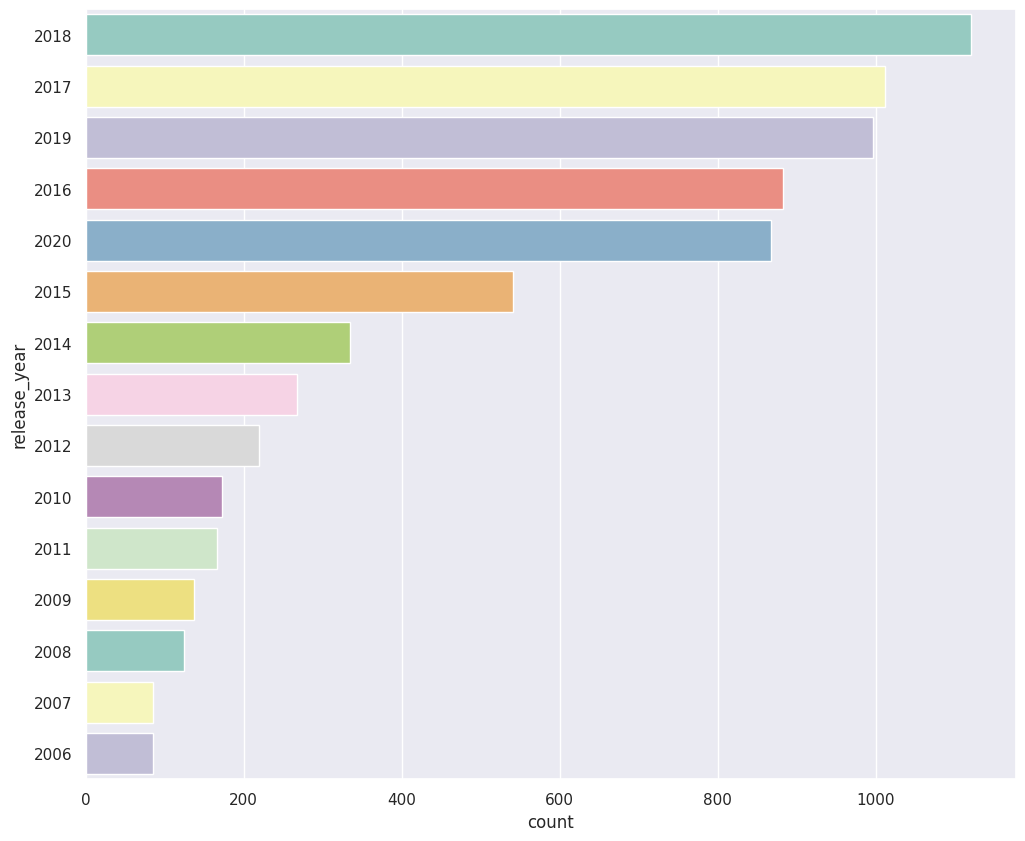

In [ ]:
#visualize our result
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=df, palette="Set3", order=df['release_year'].value_counts().index[0:15])

* **Inference**  

  *   2018 has highest movie counts in netflix followed by 2017,2016,2015 etc.  

  * year by year movie counts are increasing it defines public likes netflix content year by year and new public joins netflix. so it defines sustainable growth of netflix.

#**7.Release years**

In [ ]:
df.type.value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

#**Total Content Released each year**

In [ ]:
yearly_movies=df[df.type=='Movie']['release_year'].value_counts().sort_index(ascending=False).head(10)
yearly_shows=df[df.type=='TV Show']['release_year'].value_counts().sort_index(ascending=False).head(10)
total_contents=df['release_year'].value_counts().sort_index(ascending=False).head(10)

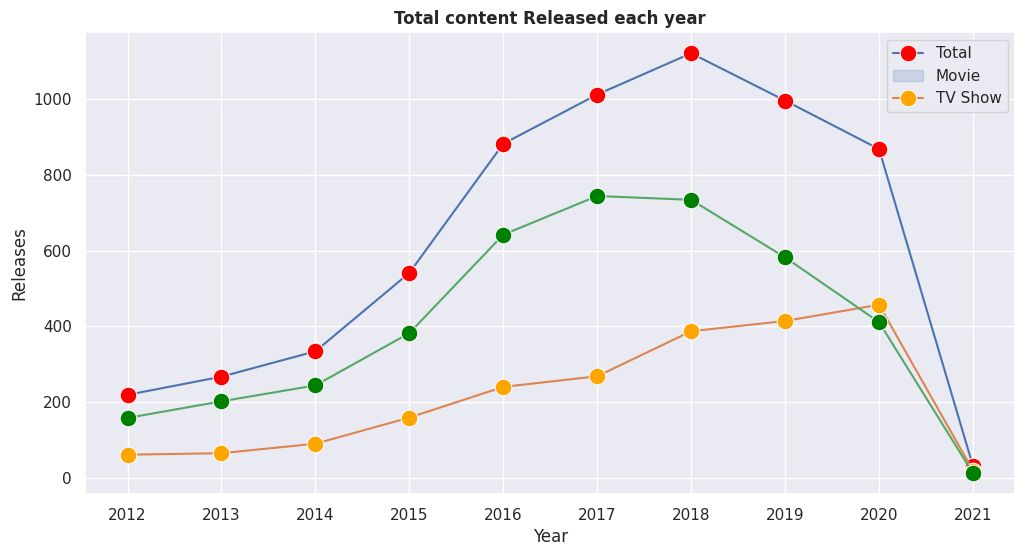

In [ ]:
#visualize in graph
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=total_contents,marker = 'o',
         markerfacecolor = 'red', markersize = 12)
sns.lineplot(data=yearly_shows,marker = 'o',
         markerfacecolor = 'orange', markersize = 12)
sns.lineplot(data=yearly_movies,marker = 'o',
         markerfacecolor = 'green', markersize = 12)
#set year range
ax.set_xticks(np.arange(2012, 2022, 1))
plt.title("Total content Released each year",fontsize=12,fontweight='bold')
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()




**Inference**  

* we can confirm that netflix report are true as we can see numbers of tv shows are more than triple in 2018
*We can see that total contents in netflix sharply increases after 2015 this may because internet revolution in all over the world specially in big populated country like India.
*In 2020 movie counts are higher than tv shows.
*tv shows contents are sharply decreased after 2018 this shows people interest towards movie more in netflix.
*so from above graph we can conclude that to expand the business opportunities netflix should focus more on quality of movies as recently people likes movies more in netflix.

#**8.Rating**

In [ ]:
#check the unique values of rating
df.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

NameError: name 'array' is not defined

In [ ]:
import numpy as np

content_ratings = np.array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', np.nan,
                            'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)


In [ ]:
#create a pie chart with plotly.express for better visualization
#import plotly library
import plotly.express as px
#pie chart code
graph=px.pie(df,names='rating',height=500, width=900,hole=0.7,title='Netflix Rating Diistribution')
graph.show()

**Inference**:  

* Most of the programme in netflix are TV-MA(36.8%) and TV-14(24.8%) rated
* Most of the content in netflix are mature content.
* so, from this we can conclude that mature contents are most popular amongs consumer in netflix

#**Rating Distribution by Content type**

In [ ]:
# graph for different rating on movies and tv shows
plt.figure(figsize=(12,8))
sns.countplot(x='rating',hue='type',data=df,palette="magma")
plt.title('Relation between Type and Rating')
plt.show()

* **Inference**  

* **Most of the Movies and tv shows have rating of TV-MA (Mature Audience)**  

* for the younger audience (under the age of 17), it is the opposite, there are slightly more TV shows than there are movies.
* It defines may be young people are more fond of tv shows

# **9.Duration**


In [ ]:
#check unique values of movie/tv shows duration first
df.duration.unique()

In [ ]:
#subsetting TV Show and Movie for duration
netflix_tvshows=df[df['type']=='TV Show']
netflix_movies=df[df['type']=='Movie']

#**Distribution of Netflix Movie Duration**

In [ ]:
#movie duration subsetting and changing type
netflix_movies['duration']=netflix_movies['duration'].str.replace(' min','')
#change type to int for furthur visualization
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)
netflix_movies['duration']

In [ ]:
#so duration of movies
sns.set_style('whitegrid')
sns.kdeplot(data=netflix_movies['duration'], shade=True)

* **Inference**:  

* Most movies in netflix have 70-120 min duration

#**Analyze Duration of TV Shows**

In [ ]:
#netflix show duration analysis
netflix_tvshows['duration']=netflix_tvshows['duration'].str.replace(' Season','')
netflix_tvshows['duration']=netflix_tvshows['duration'].str.replace(' Seasons','')
netflix_tvshows['duration']=netflix_tvshows['duration'].str.replace('s','')
netflix_tvshows['duration']=netflix_tvshows['duration'].astype(str).astype(int)
netflix_tvshows['duration']


In [ ]:
#so duration of tvshows
sns.set_style('darkgrid')
sns.kdeplot(data=netflix_tvshows['duration'], shade=True)

**Inference:**  

* Most of the tv shows are 1 to 2 seasons long.
very few shows are stretch upto 5 and 8 seasons

# **10.Listed_in**

In [ ]:
df.listed_in.unique()

In [ ]:
no_of_category = []
for categories in df.listed_in.values:
  len_categories = len(categories.split(","))
  no_of_category.append(len_categories)

In [ ]:
df['no_of_category'] = no_of_category


In [ ]:
df[['listed_in' , 'no_of_category']].head()


#**Creating Genres**

In [ ]:
#create genres
genres = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
genres


#**Top Genres on Netflix**


In [ ]:
# ploting graph for top 10 genres
plt.figure(figsize=(7,9))
g = sns.countplot(y = genres, order=genres.value_counts().index,palette = "Pastel1")
plt.title('Top 10 Genres on Netflix')


In [ ]:
# genres cloud
plt.subplots(figsize=(15,15))
#generated the wordcloud image
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(genres))
#display the generated image
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

* **Inference:**
* we can see that International Movies,Dramas,Comedies,International Tv shows are most popular genres on netflix.
* TV thrillers, tv shows, classic & cult shows these are very bad genres and allmost no popularity.
Even though the United States has the most content available, it looks like Netflix has decided to release a ton of international movies.

In [ ]:
df['genre'] = df['listed_in'].apply(lambda x: x.split(",")[0])

In [ ]:
df['genre'].value_counts()

# **Bi-variate and Trend Analysis**


## #**Country wise Trend Analysis**


# **Country vs Genres trend**


In [ ]:
df.country.nunique

In [ ]:
#genre country wise create function
def get_genre_country_trends(df):
  def explode_country(country):
    #excecute split on the basis of ',' otherwise return ''
    try:
        return country.split(", ")
    except:
        return ""
  #create seperate country list and genre list
  df['country_list'] = df.apply(lambda x: explode_country(x['country']),axis=1)
  df = df.explode('country_list')

  df['genre_list'] = df.apply(lambda x: explode_country(x['listed_in']),axis=1)
  df = df.explode('genre_list')

  #find country and their preferred genre
  df.groupby(['country_list','genre_list']).agg({'title':'count'})
  grouped_df_ = df.groupby(['country_list','genre_list']).agg({'title':'count'})
  grouped_df = grouped_df_.reset_index()
  grouped_df['country_list'].values
  grouped_df = grouped_df[grouped_df.country_list != '']
  rating_country_df = grouped_df.reset_index().drop("index", axis=1)

#visualize country vs genres trend with graph
  list_of_countries = list(set(list(rating_country_df['country_list'].values)))
  for each in list_of_countries:
    rating_country_df[rating_country_df['country_list'] == each].sort_values("title",ascending=False).plot.bar(x = "genre_list", y="title", color="red", rot=90, figsize=(9,5))
    plt.title(f"{each}")
  return rating_country_df


In [ ]:
rating_country_df = get_genre_country_trends(df)

# **Word Cloud for countries like US, India, UK, France, China etc**.


In [ ]:
def get_word_clouds(rating_country_df):
  country_list_ = ["United States", "India", "United Kingdom", "France", "China"]
  #using wordcloud to identify most used words
  from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
  for each in country_list_:
    plt.rcParams['figure.figsize'] = (10, 10)
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'white', width = 1000,  height = 500, max_words = 121).generate(' '.join(rating_country_df[rating_country_df["country_list"]==each]['genre_list']))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(f'Most popular genres for {each}',fontsize = 30)
    plt.show()

In [ ]:
get_word_clouds(rating_country_df)

**Inference:**  

* International Movies,Comedies,Dramas etc are most popular genres in most of the countries including US,India,France etc.
* It defines that people expected more internation movies, shows than regional shows in netflix.
* Interestingly US people prefers drama, comedies genres more as netflix is an us company so they do not prefer international movies much in netflix.
* Indian people prefers international movies in netflix like most of other countries.
* so from this we can conclude that netflix should focus more on their international movie and tv shows as people likes and consumes their content most often from all over the world. It will surely impacts their businesses positively.

# **Country vs Rating Trend analysis**


In [ ]:
#getting country wise rating trend
def get_country_ratings_trends(df):
  def explode_country(country):
   #excecute split on the basis of ',' otherwise return ''
    try:
        return country.split(", ")
    except:
        return ""

   #create seperate country list
  df['country_list'] = df.apply(lambda x: explode_country(x['country']),axis=1)
  df = df.explode('country_list')

  #find country and their preferred rating
  grouped_df_ = df.groupby(['country_list','rating']).agg({'title':'count'})
  grouped_df = grouped_df_.reset_index()
  grouped_df['country_list'].values
  grouped_df = grouped_df[grouped_df.country_list != '']
  rating_country_df = grouped_df.reset_index().drop("index", axis=1)

  #visualize country vs genres trend with graph
  list_of_countries = list(set(list(rating_country_df['country_list'].values)))
  for c in list_of_countries:
    rating_country_df[rating_country_df['country_list'] == c].sort_values("title",ascending=False).plot.bar(x = "rating", y="title", color="cyan", rot=45, figsize=(10,10))
    plt.title(f"{c}")


In [ ]:
get_country_ratings_trends(df)

**Inference:**

* TV-MA( Mature content) is the most popular rating in netflix in most of the countries.
* In India and China TV-14 is the most rated while TV-MA rated movies are 2nd best preffered.
* US,france,Israel,UK all countries watch TV-MA rated movies mostly.
* It concludes that Netflix should focuses more on mature content movies quality as most of the countries all over world likes it in netflix.it should increase their content watch hours and business opportunities.

#**Country vs Type trend analysis**

In [ ]:
#getting country wise rating trend
def get_country_type_trends(df):
  def explode_country(country):
   #excecute split on the basis of ',' otherwise return ''
    try:
        return country.split(", ")
    except:
        return ""

   #create seperate country list
  df['country_list'] = df.apply(lambda x: explode_country(x['country']),axis=1)
  df = df.explode('country_list')

  #find country and their preferred type
  grouped_df_ = df.groupby(['country_list','type']).agg({'title':'count'})
  grouped_df = grouped_df_.reset_index()
  grouped_df['country_list'].values
  grouped_df = grouped_df[grouped_df.country_list != '']
  rating_country_df = grouped_df.reset_index().drop("index", axis=1)

  #visualize country vs genres trend with graph
  list_of_countries = list(set(list(rating_country_df['country_list'].values)))
  for c in list_of_countries:
    rating_country_df[rating_country_df['country_list'] == c].sort_values("title",ascending=False).plot.bar(x = "type", y="title", color="khaki", rot=45, figsize=(10,10))
    plt.title(f"{c}")

In [ ]:
get_country_type_trends(df)

**Inference**:  


* Generally countries preferred movies over tv shows in netflix maybe because it has more movie counts than tv shows.
* It concludes that to expand their business more netflix should produce more tv shows and must increase the quality of movies as it is their most popular type.

In [ ]:
df.info()

# **Which months preferred by netflix for movie release?**

In [ ]:
sns.countplot(df['month_added'],color='skyblue')
plt.title("Month wise Content on netflix",fontsize=15,fontweight='bold')

**Inference:**  

* So, we can see december month relesed most content in netflix followed by october,november,january.
* It concludes that netflix targets christmas new year time most probably for their content promotion as in that period of time all over the world's people are in festive mood specially in european country like us,uk,france,canada targets these time for leisure,relaxation.
* Data suggests that these tactics positively impacts their business over the years as their business grows sustainably year by year and new customer enjoys their content.

#**Pre-process data & NLP before clustering**


In [ ]:
df.info()

In [ ]:
df.description.iloc[0]

In [ ]:
first_description=df.description.iloc[0]

# **Remove Punctuation**  
* Punctuations does
not carry any meaning in clustering,

* so removing
punctuations helps to get rid of unhelpful parts of the data, or noise.

In [ ]:
#importing libraries
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)


In [ ]:
df['description'] = df['description'].apply(remove_punctuation)
df.head().T

* **We have successfully remove punctuation**

#**Remove Stopwords**

* Stop-words are
basically a set of commonly used words in any language, not just in English.

* If we remove the
words that are very commonly used in a given language, we can focus on the important words instead.

**Download stopwords**

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
# extracting the stopwords from nltk library
st = nltk.corpus.stopwords.words('english')
# displaying the stopwords
for i in st:
  print(i , end=',  ')

In [ ]:
print("Number Of Stopwords in English : ",len(st))


In [ ]:
def remove_stopwords(text):
  ''' a for removing the stopwords'''
  #Method 1
  text1 = [word.lower() for word in text.split() if word.lower() not in st]
  return " ".join(text1)


In [ ]:
df['description'] = df['description'].apply( remove_stopwords )
df.head().T

**Now we have successfully removed stopwords**

# **Count Vocabulary items using CountVectorizer()**

* Counting vocabulary item is very important step of nlp
* It extract important most frequent used words from particular column and create a dictionary which furthur use in text normaization process(stemming).

In [ ]:
# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(df['description'])
# Collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [ ]:
dictionary

In [ ]:
vocab = [ ]
count_of_vocab = []
for key , value in dictionary:
  vocab.append( key )
  count_of_vocab.append( value )


**create a new dataframe vocab before stemming**

In [ ]:
#store the count in pandas dataframe with vocab as index
vocab_before_stemming = pd.DataFrame({"Words":vocab,
                                     "count":count_of_vocab})
#store the dataframe
vocab_before_stemming =  vocab_before_stemming.sort_values("count" ,ascending=False)


In [ ]:
vocab_before_stemming.head(20).T


# **Text Normalization**

# **Stemming**

* SO WHY WE USE STEMMING HERE?
* Stemming lets us standardize words to their base stem irrespective of their inflections, which helps many applications like clustering or classifying text.
* Search engines use these techniques extensively to give better results irrespective of the word form. When creating the search index we take similar terms and stem them to a root word so that searches on other forms of the word match our document.

**Now we use SnowballStemmer('english')**

In [ ]:
# Create an object of stemming function
stemmer = SnowballStemmer("english")

In [ ]:
def Apply_stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)


In [ ]:
#Stemming for description
df['description'] = df['description'].apply( Apply_stemming )
df.head().T

#**Text Vectorization**




# **Tfidf vectorization**

TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. This is a very common algorithm to transform text into a meaningful representation of numbers which is used to fit a machine learning algorithm for prediction

* **Why Tfidf vectorization?**

* TF-IDF model contains information on the more important words and the less important ones as well
* TF gives us information on how often a term appears in a document and IDF gives us information about the relative rarity of a term in the collection of documents.

In [ ]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(df['description'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()



In [ ]:
# Lists to store the vocab and counts
vocab = []
count_of_vocab = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)

# **Top 15 most occured vocab**

In [ ]:
# Store the count in panadas dataframe with vocab as index
vocab_after_stemming = pd.DataFrame({"Word": vocab ,
                                      "count" :count_of_vocab})
# Sort the dataframe
vocab_after_stemming = vocab_after_stemming.sort_values("count" ,ascending=False)


In [ ]:
top15_most_ocurred_vocab = vocab_after_stemming.head(15)
top15_most_occurred_words = top15_most_ocurred_vocab.Word.values
top15_most_occurred_words


In [ ]:
top15_most_occurred_words_count = top15_most_ocurred_vocab['count'].values
top15_most_occurred_words_count

In [ ]:
plt.figure( figsize = ( 16,6 ))
plt.xlim(14237,14253)
plt.barh(top15_most_occurred_words , top15_most_occurred_words_count )


* **Inference**:  

* seref,orai,lukasz these words are coming again and again

In [ ]:
df['Length(description)'] = df['description'].apply(lambda x: len(x))
df.head(3).T

In [ ]:
df.description.iloc[0]

In [ ]:
len(df.description.iloc[0])

# **For listed_in feature**

## **Removing Punctuation**

In [ ]:
df['listed_in']=df['listed_in'].apply(remove_punctuation)
df.head(5).T

# **Removing Stop_Words**

In [ ]:
df['listed_in']=df['listed_in'].apply(remove_stopwords)

# **Count voacabulary items**

In [ ]:
# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(df['listed_in'])
# Collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [ ]:
dictionary

In [ ]:
vocab = [ ]
count_of_vocab = []
for key , value in dictionary:
  vocab.append( key )
  count_of_vocab.append( value )

In [ ]:
listed_in_vocab_before_stem = pd.DataFrame({"Word": vocab , "count" :count_of_vocab})
listed_in_vocab_before_stem = listed_in_vocab_before_stem.sort_values("count" ,ascending=False)

In [ ]:
listed_in_vocab_before_stem.head().T

# **TOP 15 most occurred words in listed in**

In [ ]:
top15_most_ocurred_vocab_listed_in = listed_in_vocab_before_stem.head(15)


In [ ]:
top15_most_ocurred_words_listed_in = top15_most_ocurred_vocab_listed_in.Word.values
top15_most_ocurred_words_listed_in


In [ ]:
array(['tv', 'thrillers', 'teen', 'talk', 'standup', 'sports',
       'spirituality', 'spanishlanguage', 'shows', 'series', 'scifi',
       'science', 'romantic', 'reality', 'nature'], dtype=object)

In [ ]:
top15_most_occurred_words_in_listed_in_count = top15_most_ocurred_vocab_listed_in['count'].values
top15_most_occurred_words_in_listed_in_count


In [ ]:
plt.figure( figsize = ( 10,6 ))
plt.xlim(26 , 42 )
plt.barh(top15_most_ocurred_words_listed_in , top15_most_occurred_words_in_listed_in_count )

wordcloud of top 15 most used words in listed_in

In [ ]:
#  wordcloud code
plt.subplots(figsize=(15,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(top15_most_ocurred_words_listed_in))
#image visualization of most frequent words
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


* Inference:  

* We can see that tv,thrillers,teen,talk these are most popular words in listed_in
* Netflix can grow their business more if they focus more on these popular listed_in words related movies.

# **Using Stemming**

Now will  use **SnowballStemmer( 'english' )**





In [ ]:
#Stemming for description
df['listed_in'] = df['listed_in'].apply( Apply_stemming )
df.head(3).T

# **Using Tf-IDF Vectorizer**

In [ ]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()
# Fit the vectorizer using the text data
tfid_vectorizer.fit(df['listed_in'])
# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [ ]:
dictionary


In [ ]:
# Lists to store the vocab and counts
vocab = []
count_of_vocab = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)


In [ ]:
Creating a new DataFrame vocab_after_stemming_listed_in

Creating a new DataFrame **vocab_after_stemming_listed_in**

In [ ]:
vocab_after_stemming_listed_in = pd.DataFrame({"Word": vocab , "count" :count_of_vocab})
# Sort the dataframe by count
vocab_after_stemming_listed_in = vocab_after_stemming_listed_in.sort_values("count" ,ascending=False)

# **Plot of the top vocab present in listed_in (after stemming)**

In [ ]:
top15_most_ocurred_vocab_lised_in_after_stem = vocab_after_stemming_listed_in.head(15)


In [ ]:
top15_most_ocurred_vocab_lised_in_after_stem_word = top15_most_ocurred_vocab_lised_in_after_stem.Word.values
top15_most_ocurred_vocab_lised_in_after_stem_word

In [ ]:
top15_most_occurred_words_listed_in_count = top15_most_ocurred_vocab_lised_in_after_stem['count'].values
top15_most_occurred_words_listed_in_count


In [ ]:
plt.figure( figsize = ( 10,6 ))
plt.xlim(24, 40 )
plt.barh(top15_most_ocurred_vocab_lised_in_after_stem_word , top15_most_occurred_words_listed_in_count )

In [ ]:
# using wordcloud
plt.subplots(figsize=(15,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(top15_most_ocurred_vocab_lised_in_after_stem_word))
#image visualization
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

* Inference:  

* After stemming we also conclude same thing our top vocabulary present in listed_in are tv,thriller,teen,talk etc.

In [ ]:
df['Length(listed-in)'] = df['listed_in'].apply(lambda x: len(x))
df.head(3).T



In [ ]:
df[['description', 'Length(description)', 'listed_in' ,'Length(listed-in)' ]].head(3)



# **Applying Clustering Algorithms**

**Clustering: -**

Clustering can be considered the most important unsupervised learning problem; so, as every other problem of this kind, it deals with finding a structure in a collection of unlabeled data.A loose definition of clustering could be “the process of organizing objects into groups whose members are similar in some way”.A cluster is therefore a collection of objects which are “similar” between them and are “dissimilar” to the objects belonging to other clusters.


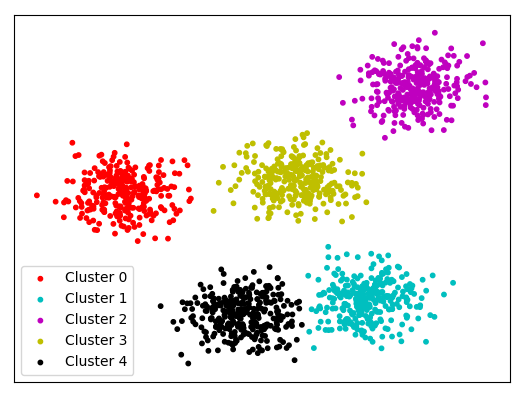


# ***Here we use 5 different clustering alogorithm***





In [ ]:
df.columns

In [ ]:
X_features_rec = df[['no_of_category' ,'Length(description)','Length(listed-in)']]
stdscaler = preprocessing.StandardScaler()

In [ ]:
X_features_rec.describe()

In [ ]:
X_rescale=stdscaler.fit_transform(X_features_rec)
X=X_rescale
silhouette_score_ = [  ]
range_n_clusters = [i for i in range(2,16)]


In [ ]:
#find silhoutee score
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    silhouette_score_.append([int(n_clusters) , round(score , 3)])
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

In [ ]:
temp = pd.DataFrame(silhouette_score_ , columns = ["n clusters" , "silhouette score"])
temp = temp.sort_values( "silhouette score" , ascending = False )
temp.head(14)


**Inference**  
* The value of the silhouette coefﬁcient is between [-1, 1]. A score of 1 denotes the best meaning that the data point is very compact within the cluster to which it belongs and far away from the other clusters.
* The worst value is -1. Values near 0 denote overlapping clusters

In [ ]:
range_n_clusters = [i for i in range(2,16)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:

Mean intra-cluster distance: Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a.

* **Mean nearest cluster distance:** Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.
a more increased
Silhouette Coefficient score correlates to a model with better-defined clusters. The Silhouette Coefficient is determined for each sample and comprised of two scores





**2.Elbow Method**

The Elbow Curve is one of the most popular


methods to determine this optimal value of k. The elbow curve uses the sum of squared distance (SSE) to choose an ideal value of k based on the distance between the data points and their assigned clusters.

In [ ]:
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

* the elbow method is used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use.

* After k=3 curve gets linear it means k=3 is the best cluster



# **USING 3 CLUSTER**

In [ ]:
kmeans = KMeans(n_clusters = 3 )
kmeans.fit(X)
y_kmeans= kmeans.predict(X)


In [ ]:
plt.figure(figsize=(12 , 6))
plt.title('description and listed_in')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='RdYlGn')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)


# **3.DBSCAN**

In [ ]:
#import libraries
from sklearn.cluster import DBSCAN
from sklearn import metrics

y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=( 8 , 5 ))
plt.scatter(X[:,1], X[:,2], c=y_pred)

**Inference**  

* the purple colour dots are noise. Noise means random datapoints which have no pattern and not accepted by any cluster
* Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a base algorithm for density-based clustering. It can discover clusters of different shapes and sizes from a large amount of data, which is containing noise and outliers.

# **4.Dendogram**

In [ ]:
#import libraries
from scipy.cluster.hierarchy import linkage, dendrogram

# HIERARCHICAL CLUSTERING
distances_linkage = linkage(X,
                            method = 'ward',
                            metric = 'euclidean')

plt.figure(figsize=(12, 12))

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('All films/TV shows')
plt.ylabel('Distance')

dendrogram(
    distances_linkage,
    no_labels = True
)

plt.show()



* A dendrogram is a branching diagram that represents the relationships of similarity among a group of entities.

* dendrogram which is tree-like chart that shows the sequences of merges or splits of clusters. If two clusters are merged, the dendrogram will join them in a graph and the height of the join will be the distance between those clusters.

* So, from all the observation we go with 3 clusters as every method giving best result for 3 clusters.

# **No. of Cluster = 3**

# **5.Agglomerative Clustering**

The agglomerative clustering is the most common type of hierarchical clustering used to group objects in clusters based on their similarity.



In [ ]:

# Let's  import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [ ]:
# Visualizing the clusters (three dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'khaki', label = '1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'magenta', label = '2')

# plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = '3')

plt.title('Clusters of content',fontsize=12,fontweight='bold')

plt.legend()
plt.show()



# **Recommendation System**

In [ ]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#get the tf-idf scores
#create TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['description'])

#shape of tfidf_matrix
tfidf_matrix.shape

In [ ]:
pd.DataFrame(tfidf_matrix[0].T.todense(), index=tfidf.get_feature_names(), columns=["tf-idf score"])


In [ ]:
#CountVectorizer: Convert a collection of text documents to a matrix of token counts
#TfidfTransformer: Transform a count matrix to a normalized tf or tf-idf representation

from sklearn.pipeline import Pipeline

pipe = Pipeline([('cv', CountVectorizer(stop_words='english')),
                ('tfid', TfidfTransformer())]).fit(df['description'])

print("CountVectorizer_matrix: {}".format(pipe['cv'].transform(df['description']).toarray()))
print("CountVectorizer_matrix: {}".format(pipe['tfid'].idf_))

In [ ]:
#The lower the IDF value of a word, the less unique it is to any particular document
pd.DataFrame(pipe['tfid'].idf_, index=pipe['cv'].get_feature_names(), columns=['idf_weights'])


* Limitation of TF-IDF
* As the ordering of the sentence is discarded.
compute similarity directly in the word-count space, which may be slow for large vocabularies

* assume the counts of different words are independent
synonyms between words are ignored, eg trip and journey

# **Calculate cosine similarity by sklearn.pairwise.package**

Cosine similarity Three way to calculate similiarity

* Euclidean distance
Pearson correlation Cosine similiarity Here cosine similarity is used.

* It measures the cosine of the angle between two vectors projected in a multi-dimensional space to find out how similar the documents are irrespective of their size.
* **The smaller the angle, higher the cosine similarity.**  

It is advantageous because even if the two similar documents are far apart by the Euclidean distance (due to the size of the document).

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix)



In [ ]:
programme_list=df['title'].to_list()


In [ ]:
def recommend(title, cosine_similarity=cosine_sim):
    index = programme_list.index(title)
    sim_score = list(enumerate(cosine_sim[index]))

    #position 0 is the movie itself, thus exclude
    sim_score = sorted(sim_score, key= lambda x: x[1], reverse=True)[1:11]
    recommend_index = [i[0] for i in sim_score]
    rec_movie = df['title'].iloc[recommend_index]
    rec_score = [round(i[1],4) for i in sim_score]
    rec_table = pd.DataFrame(list(zip(rec_movie,rec_score)), columns=['Recommend programme','Similarity(0-1)'])
    return rec_table


In [ ]:
recommend("Indiana Jones and the Last Crusade")


In [ ]:
recommend('Avengers: Infinity War')

**Inference**  

* So, this is the recommendation engine we created based on description of particular movie/tv shows
* the higher the similarity score is the higher it recommended.

In [ ]:
tfidf_matrix2 = tfidf.fit_transform(df['genre'])
tfidf_matrix2.shape

In [ ]:
cosine_sim2 = cosine_similarity(tfidf_matrix2)

In [ ]:
recommend2("Indiana Jones and the Last Crusade")


In [ ]:
recommend('Avengers: Infinity War')

**Inference:**  

* here we create recommendation system based on genre of content in netflix.
* for "Indiana Jones and the Last Crusade" movie first two results are highly recommended as similarity score is 1.0.
* for avenger also we got recommended movies. as avengers is marvel production so maybe that's why our top recommended movies are also marvel's movies.
* Both of these recommendation system suggests us best movies in netflix according to our recent interest. It will defnetly increases watch time, content retention and hugely positively impacts netflix business with more profitability and business opportunity.

# **Future Scope**

* We could have done more research on recommendation system.  

* Integrate Netflix dataset with other data set and present more insights and clusters.
* We can do more Post Cluster Analysis.
* We can get more insight and analysis from dataset.

# **Conclusion**

1. In dataset we got 2389 null values in director, 718 in cast, 507 in country, 10 in date_added, 7 in rating column. after analyzing type column we got netflix has more movies than tv shows.(69% movies and 31% tv shows)
It defines that movies on netflix have high demand among people so netflix should focus more good quality movies and increase their business opportunity.

2. In title column we got 'Love','Man','World','Story','Life' seems very common word.overwhelming number of content having 'Christmas'also.We are suspecting "Christmas" titles to be a very seasonal thing with most of the shows likely to be released during the month of December.

3. After analyzing director column we got Raul Campos, jan suter combinely best director who directs most movies(18) in netflix followed by marcus roby(16), jay karas(14), catthy garcia-molina(13).

4. Anupam Kher is the most popular actor in netflix followed by sharukhkhan, nashiruddin shah,om puri,akshay kumar etc.

Anupam kher's movie count is over 40 in netflix and for sharukhkhan it is 35. even no body is nearer to them in terms of movie count in netflix. It defines that netflix prefers both of them very much in their movies.

5. From country column we can find that The United States stands out on top since Netflix is an American company.
India comes in second followed by the UK and Canada.

6. After analyzing date-added column we find 2018 has highest movie counts in netflix followed by 2017,2016,2015 etc.
year by year movie counts are increasing it defines public likes netflix content year by year and new public joins netflix. so it defines sustainable growth of netflix.

7. we can confirm that netflix report are true as we can see numbers of tv shows are more than triple in 2018. We can see that total contents in netflix sharply increases after 2015 this may because internet revolution in all over the world specially in big populated country like India.
In 2020 movie counts are higher than tv shows. tv shows contents are sharply decreased after 2018 this shows people interest towards movie more in netflix.

8. Afteranalyzing rating column we find Most of the programme in netflix are TV-MA(36.8%) and TV-14(24.8%) rated
Most of the content in netflix are mature content. younger audience (under the age of 17), it is the opposite, there are slightly more TV shows than there are movies. It defines may be young people are more fond of tv shows

9. From duration column we got Most movies in netflix have 70-120 min duration and Most of the tv shows are 1 to 2 seasons long.

10. from listed_in column we have created genres.from genres we can see that International Movies,Dramas,Comedies,International Tv shows are most popular genres on netflix.

TV thrillers, tv shows, classic & cult shows these are very bad genres and allmost no popularity. Even though the United States has the most content available, it looks like Netflix has decided to release a ton of international movies.

11. From country vs genres trend we find International Movies,Comedies,Dramas etc are most popular genres in most of the countries including US,India,France etc.
Interestingly US people prefers drama, comedies genres more as netflix is an us company so they do not prefer international movies much in netflix. Indian people prefers international movies in netflix like most of other countries. so from this we can conclude that netflix should focus more on their international movie and tv shows as people likes and consumes their content most often from all over the world. It will surely impacts their businesses positively.

12. From country vs rating trend we find TV-MA( Mature content) is the most popular rating in netflix in most of the countries.
In India and China TV-14 is the most rated while TV-MA rated movies are 2nd best preffered. US,france,Israel,UK all countries watch TV-MA rated movies mostly. It concludes that Netflix should focuses more on mature content movies quality as most of the countries all over world likes it in netflix.it should increase their content watch hours and business opportunities.

13. From country vs type trend we find most countries preferred movies over tv shows in netflix .
It concludes that to expand their business netflix should produce more tv shows and must increase the quality of movies as it is their most popular type.

14. we can see december month relesed most content in netflix followed by october,november,january.

15 . In text analysis (NLP) and data pre-processing I removed punctuations,stop words as they are unhelpful part then we count vocabulary items using countvectorizer() which create dictionary of most frequent important words.
* To normalize the text we use stemming here.Through text vectorization process we transform text into a meaningful representation of numbers which is used to fit a machine learning algorithm for prediction here we use Tf-IDF vectorization as it contains contains information on the more important words and the less important ones as well.
* seref,orai,lukasz these words are top in vocab present in description and top vocabulary present in listed_in are tv,thriller,teen,talk etc.
16. By applying the silhouette score method for n

range clusters on dataset we got best score for 3 clusters it means content explained well on their own clusters, by using elbow method after k = 3 curve gets linear it means k = 3 will be the best cluster.

17. From DBSCAN clustering algorith we identified different shapes and sizes from a large amount of data, which is containing noise and outliers.Applied different clustering models like Kmeans, hierarchical, Agglomerative clustering,DBSCAN on data we got the best cluster arrangements.

18. After creating recommendation system based on description and genre we got best movies according to our recent interest. for example for "Indiana Jones and the Last Crusade" movie first two results are highly recommended and those are also Indiana Jones series movie.It will defnetly increases watch time, content retention and impacts netflix business with more profitability and business opportunities.